# Week 1 Learning Summary and Final Refresher

### Pandas

In [ ]:
import pandas as pd
print(pd.__version__)

2.2.3


In [18]:
#Pandas Series
"""
Pandas series is like a column in a table. A one-dimensional array that can hold data of any type.
"""

a = [1,7,2]
a_var = pd.Series(a)
print (a_var)

0    1
1    7
2    2
dtype: int64


In [43]:
# Dataframe creation and reading CSVs
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [15]:
for i in df.columns:
    print(i)

Duration
Pulse
Maxpulse
Calories


### Practice indexing & slicing (loc, iloc, boolean indexing)

In [46]:
#Slice rows and columns using loc
loc_data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'City': ['New York', 'Paris', 'London', 'Tokyo']}
loc_df = pd.DataFrame(loc_data, index=['A', 'B', 'C', 'D'])

loc_df.loc['A':'C',['Age', 'City']]

,Age,City
A,25,New York
B,30,Paris
C,35,London


In [ ]:
# Sample .loc since the df's index is not label based
a = [1,7,2]
b_var = pd.Series(a, index = ['x', 'y', 'z'])
print(b_var)

# Access one item in the series by referring to label
print(b_var.loc['x'])
print(b_var.loc['y'])
print(b_var.loc['z'])

# Slicing
print(b_var.loc['x':'y'])

x    1
y    7
z    2
dtype: int64
1
7
2
x    1
y    7
dtype: int64


In [16]:
#Selecting one column
df['Duration']

0      60
1      60
2      60
3      45
4      45
       ..
164    60
165    60
166    60
167    75
168    75
Name: Duration, Length: 169, dtype: int64

In [ ]:
# Filtering columns and conditional selection
df['Duration'] > 60

0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167     True
168     True
Name: Duration, Length: 169, dtype: bool

In [24]:
#Slice rows
df[5:10]

,Duration,Pulse,Maxpulse,Calories
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [ ]:
# Slice rows using iloc
df.iloc[0:3]

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0


In [44]:
# Slice rows and columns using iloc
df.iloc[0:3,0:2]

,Duration,Pulse
0,60,110
1,60,117
2,60,103


In [69]:
# Perform groupby, aggregation, and sorting
print(df['Calories'].sum())

61629.600000000006


In [78]:
df.groupby('Duration').sum(),sorted

(          Pulse  Maxpulse  Calories
 Duration                           
 15          204       239     174.7
 20         1125      1314    1364.4
 25          152       168     244.2
 30         1757      2192    3074.0
 45         3762      4663    9016.8
 60         8384     10496   25815.3
 75          245       300     650.8
 80          123       146     643.1
 90          750       931    4334.4
 120         300       417    2000.5
 150         406       521    3757.6
 160         219       272    1887.4
 180         281       377    2200.8
 210         245       344    3236.4
 270         100       131    1729.0
 300         108       143    1500.2,
 <function sorted(iterable, /, *, key=None, reverse=False)>)

In [82]:
df_dropped = df.dropna()
df_dropped
mean = df['Calories'].mean()
df_filled = df['Calories'].fillna(mean)
df_filled

0      409.1
1      479.0
2      340.0
3      282.4
4      406.0
       ...  
164    290.8
165    300.0
166    310.2
167    320.4
168    330.4
Name: Calories, Length: 169, dtype: float64

In [83]:
df_filled.to_csv('sample_data_no_missing.csv')

In [65]:
# Boolean indexing and filtering
import numpy as np
samp_data = np.array([2,3,5,6,8])
mask = samp_data > 5
mask_samp = samp_data[mask]
mask_samp

array([6, 8])

# Data Visualization

In [84]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [87]:
import matplotlib.pyplot as plt

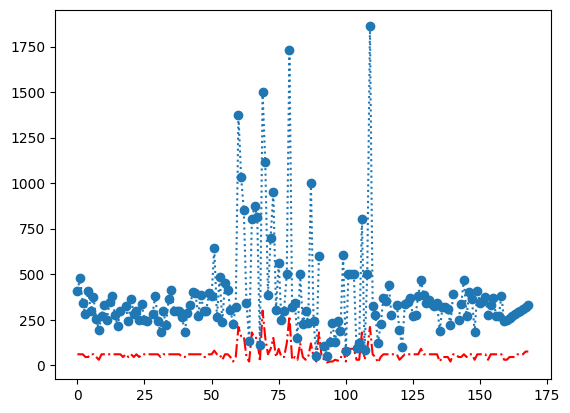

In [100]:
plt.plot(df['Duration'], linestyle = 'dashdot', color = 'r')
plt.plot(df['Calories'], linestyle = 'dotted', marker = 'o')

plt.show()

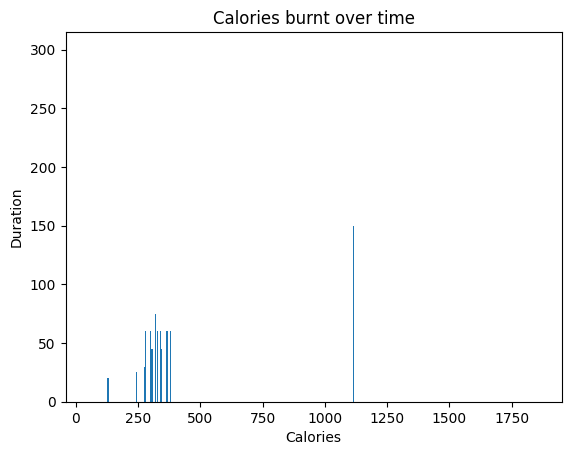

In [95]:
plt.bar(df_dropped['Calories'], df_dropped['Duration'])
plt.title("Calories burnt over time")
plt.xlabel("Calories")
plt.ylabel("Duration")
plt.show()

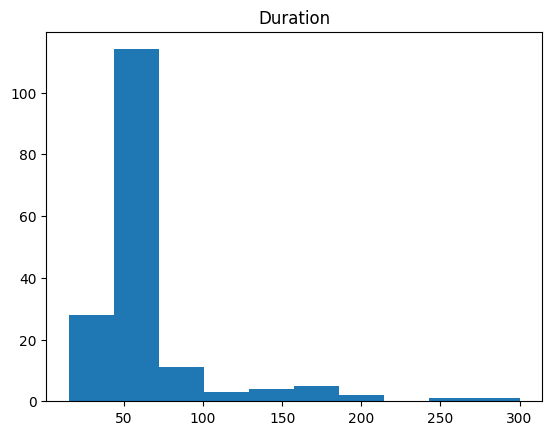

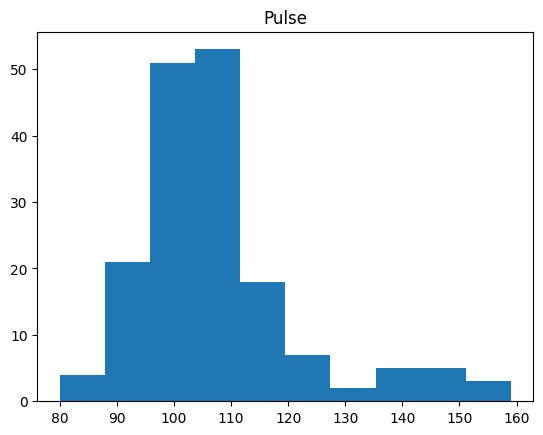

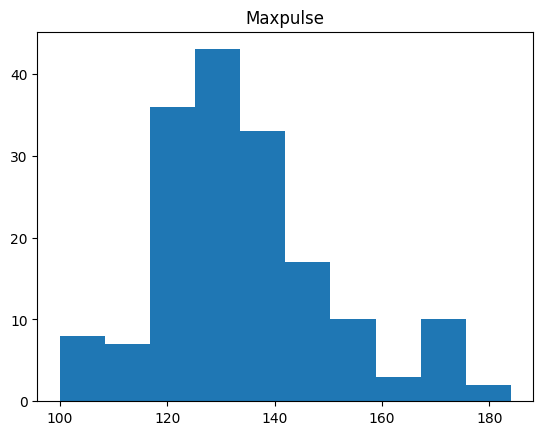

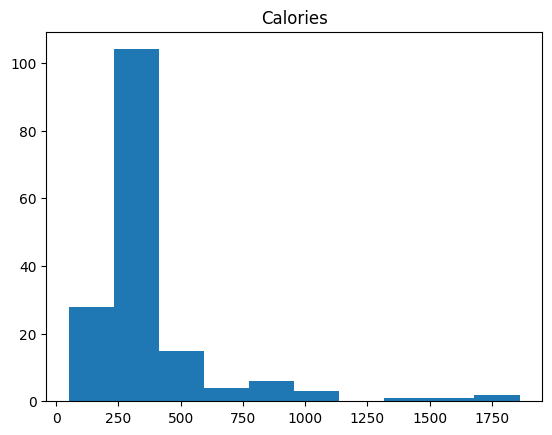

In [110]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

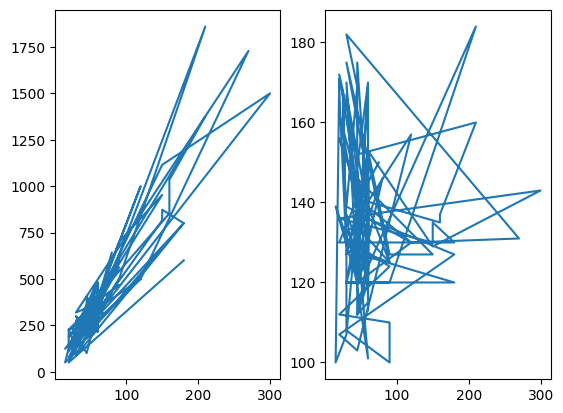

In [112]:
plt.subplot(1,2,1)
plt.plot(df['Duration'], df['Calories'])


plt.subplot(1,2,2)
plt.plot(df['Duration'], df['Maxpulse'])

plt.show()